The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize .png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [131]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Start coding here!

In [132]:
nobel = pd.read_csv('dataset/nobel.csv')
nobel

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
display(len(nobel))
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)


1000


 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America


In [134]:
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year']/10)*10).astype(int)
prop_usa_winners = nobel.groupby(['decade'], as_index=False)['usa_born_winner'].mean()

prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


Text(0.5, 1.0, 'Percentage of USA Born Winners by Decade')

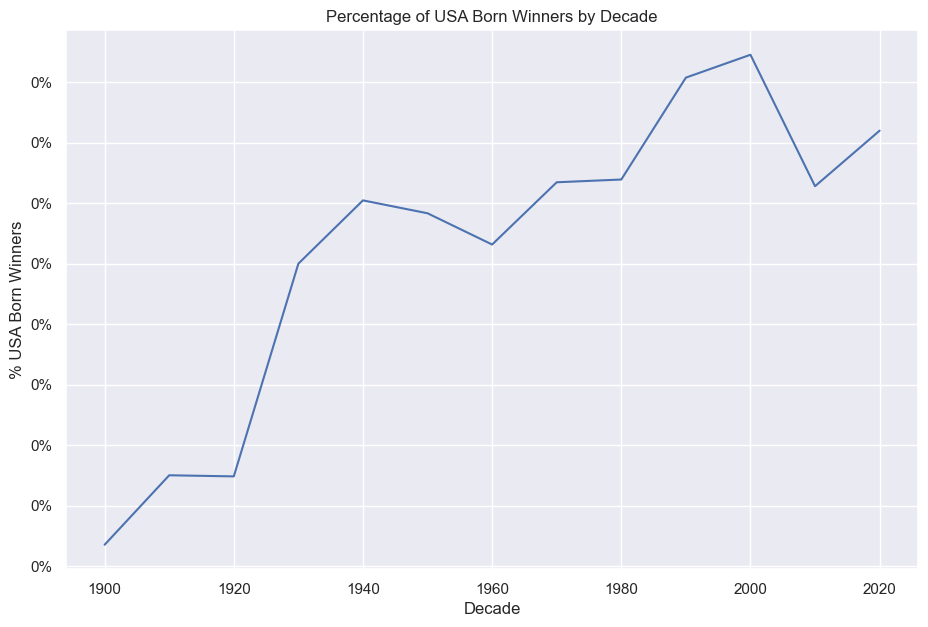

In [135]:
max_decade_usa = prop_usa_winners.copy()
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]

# Configurações de estilo e tamanho do gráfico
sns.set()
plt.rcParams['figure.figsize'] = [11, 7]

# Plotagem do gráfico de linha
ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)

# Adicionando formatação de porcentagem ao eixo y
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adicionando rótulos e título
ax.set_xlabel('Decade')
ax.set_ylabel('% USA Born Winners')
ax.set_title('Percentage of USA Born Winners by Decade')

# Exibindo 

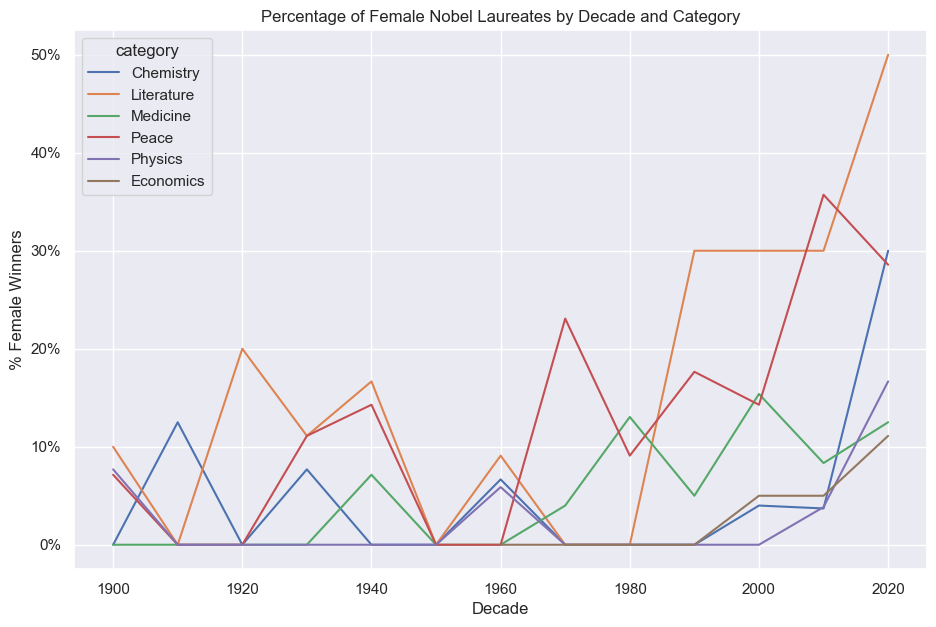

In [136]:

# Criando a coluna 'female_winner' para indicar se o vencedor é feminino
nobel['female_winner'] = nobel['sex'] == 'Female'

# Agrupando por 'decade' e 'category' e calculando a média de 'female_winner'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}


# Configurações de estilo e tamanho do gráfico
sns.set()
plt.rcParams['figure.figsize'] = [11, 7]

# Plotagem do gráfico de linha
ax = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners)

# Adicionando formatação de porcentagem ao eixo y
ax.yaxis.set_major_formatter(PercentFormatter(1))

# Adicionando rótulos e título
ax.set_xlabel('Decade')
ax.set_ylabel('% Female Winners')
ax.set_title('Percentage of Female Nobel Laureates by Decade and Category')

# Exibindo o gráfico
plt.show()


In [137]:
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")



 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [138]:
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


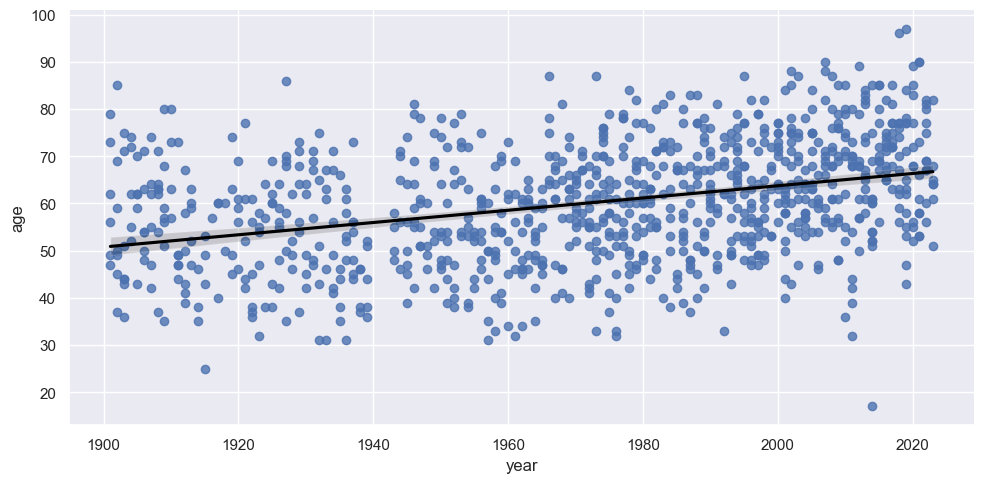

In [139]:

# Substituindo valores inválidos na coluna 'birth_date' por NaN
nobel['birth_date'] = nobel['birth_date'].replace('1993-00-00', pd.NaT)

# Convertendo a coluna 'birth_date' para o formato de data
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], format='%Y-%m-%d', errors='coerce')

# Calculando a idade dos vencedores do Prêmio Nobel
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotagem da idade dos vencedores do Prêmio Nobel sem usar LOWESS
sns.lmplot(x='year', y='age', data=nobel, aspect=2, line_kws={'color':'black'})

# Exibindo o gráfico
plt.show()


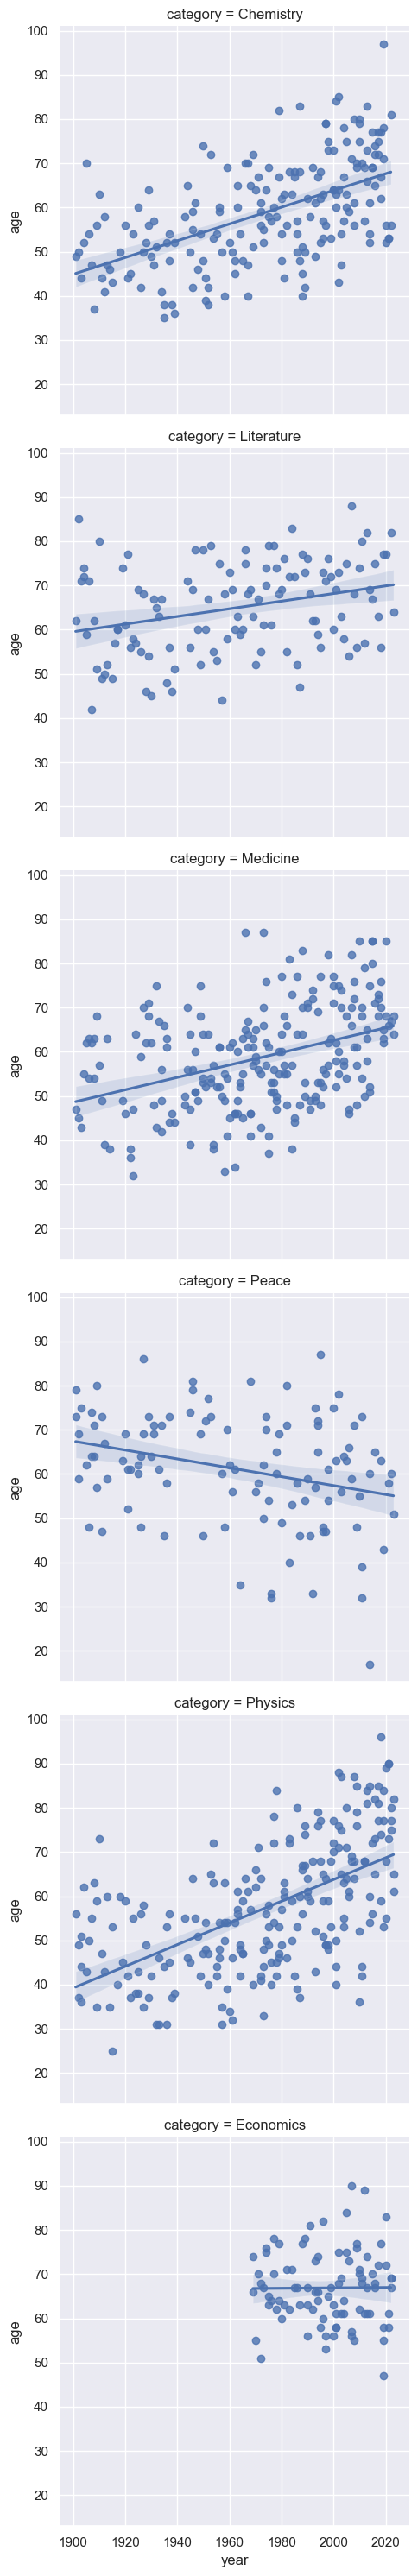

In [140]:
sns.lmplot(x='year', y='age', data=nobel, row='category')

In [141]:
display(nobel.nlargest(1,'age'))

nobel.nsmallest(1,'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
942,2019,Chemistry,The Nobel Prize in Chemistry 2019,"""for the development of lithium-ion batteries""",1/3,976,Individual,John Goodenough,1922-07-25,Jena,Germany,Male,University of Texas,"Austin, TX",United States of America,2023-06-25,"Austin, TX",United States of America,False,2010,False,97.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


In [142]:
prize_winners = 'Malala Yousafzai'
print('The name of the youngest winner of the Nobel Prize as of 2016  ---> ' + prize_winners)

The name of the youngest winner of the Nobel Prize as of 2016  ---> Malala Yousafzai
